In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grossdomesticproduct-eda/gdp.csv


In [2]:
df = pd.read_csv("/kaggle/input/grossdomesticproduct-eda/gdp.csv")
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


# Checking for the Null values, duplicate values & explore all the columns one by one since we have only 4 columns

In [3]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [6]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [7]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [8]:
df['Value'].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

# 1. How many unique countries are there in dataset?

In [9]:
len(df['Country Name'].unique())

256

In [10]:
print("*"*100)
print("These are the names of unique countries in dataset: -")
print("*"*100)

for country in df['Country Name'].unique():
    print(country)

print("*"*100)

****************************************************************************************************
These are the names of unique countries in dataset: -
****************************************************************************************************
Arab World
Caribbean small states
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (excluding high income)
East Asia & Pacific (IDA & IBRD countries)
Euro area
Europe & Central Asia
Europe & Central Asia (excluding high income)
Europe & Central Asia (IDA & IBRD countries)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
Late-demographic dividend
Latin America & Caribbean
Latin America & Caribbean (excluding high income)
Latin America & the Caribbean (IDA & IBRD countries)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle E

In [11]:
df['Country Name'].value_counts()

Country Name
Hong Kong SAR, China      57
Jamaica                   57
Honduras                  57
Caribbean small states    57
Iceland                   57
                          ..
Channel Islands           10
Nauru                     10
South Sudan                8
Somalia                    4
Cayman Islands             2
Name: count, Length: 256, dtype: int64

# 2. Let's analyze growth of a specific country suppose India

In [12]:
df[df['Country Name'] == 'India']

,Country Name,Country Code,Year,Value
6074,India,IND,1960,3.653593e+10
6075,India,IND,1961,3.870910e+10
6076,India,IND,1962,4.159907e+10
6077,India,IND,1963,4.777600e+10
6078,India,IND,1964,5.572687e+10
6079,India,IND,1965,5.876042e+10
6080,India,IND,1966,4.525364e+10
6081,India,IND,1967,4.946617e+10
6082,India,IND,1968,5.237732e+10
6083,India,IND,1969,5.766833e+10


# 2a. How many years of data we have for India?

In [13]:
len(df[df['Country Name'] == 'India'])

57

# 2b. Plot a graph of India's growth in terms of 'Year' wrt 'Value'

<Axes: xlabel='Year', ylabel='GDP'>

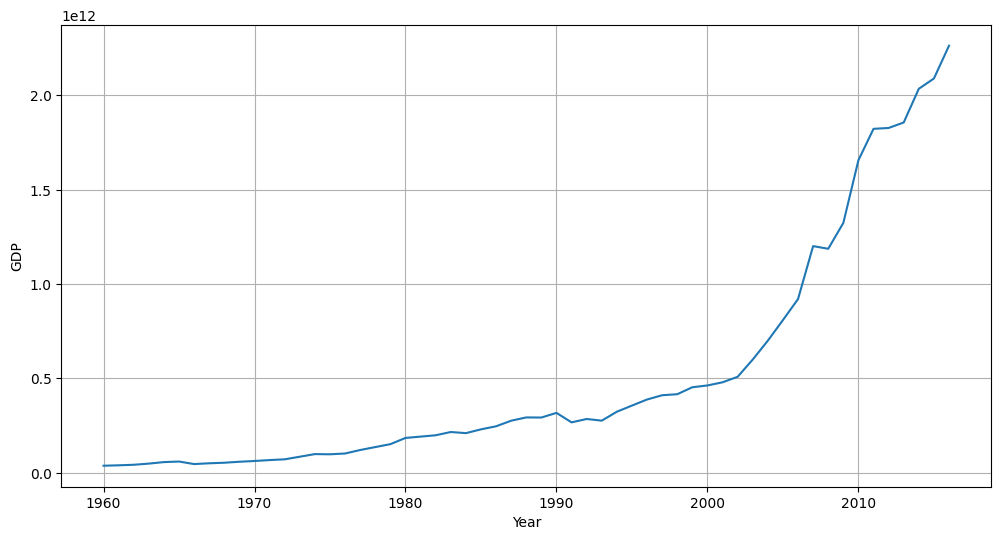

In [14]:
df_pr = df[df['Country Name'] == 'India']
df_pr.plot(x = 'Year', y = 'Value', figsize = (12,6), grid = True, legend = False, ylabel = 'GDP', xlabel = 'Year')

# 2c. Calculate GDP growth for India

In [15]:
df_pr = df[df['Country Name'] == 'India']
data = df_pr.values

result = 0
gdp_list = [0]
for i in range(1,len(data)):
    prev = data[i-1][3]
    curr = data[i][3]
    result = round(((curr - prev)/prev)*100, 2)
    gdp_list.append(result)
    
df_pr = df_pr.assign(GDP = gdp_list)
df_pr

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
6079,India,IND,1965,5.876042e+10,5.44
6080,India,IND,1966,4.525364e+10,-22.99
6081,India,IND,1967,4.946617e+10,9.31
6082,India,IND,1968,5.237732e+10,5.89
6083,India,IND,1969,5.766833e+10,10.10


# 2d. Plot a graph of India's GDP growth in terms of 'Year'

<Axes: xlabel='Year', ylabel='GrowthRate(GDP)'>

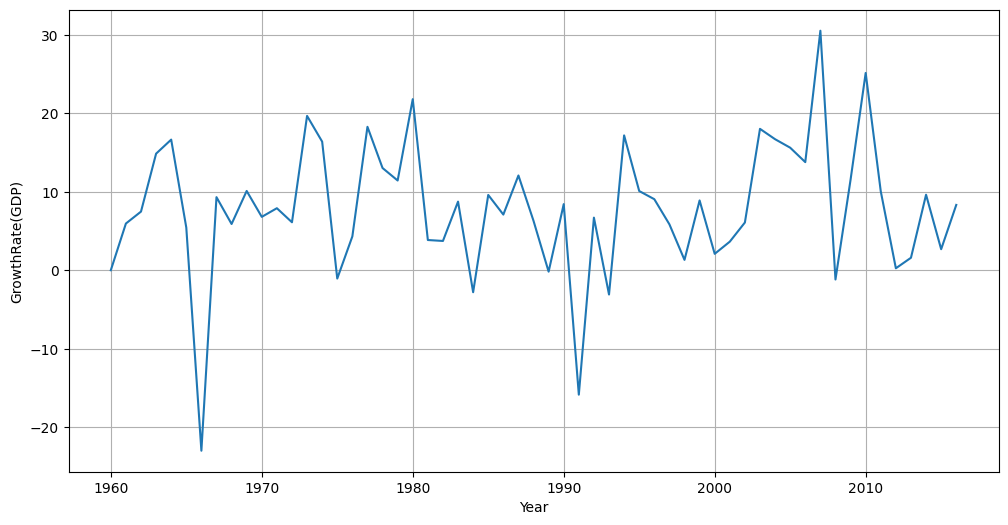

In [16]:
df_pr.plot(kind = 'line', x = 'Year', y = 'GDP', xlabel = 'Year', ylabel = 'GrowthRate(GDP)', figsize = (12,6), grid = True, legend = False)

# 3. Calculate GDP for whole dataset, all countries

In [17]:
final_data = []

for country in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country]
    data = df_pr.values
    
    gdp_list = [0]
    result = 0
    for i in range(1, len(data)):
        prev = data[i-1][3]
        curr = data[i][3]
        result = round(((curr - prev)/prev)*100, 2)
        gdp_list.append(result)
        
    df_pr = df_pr.assign(GDP = gdp_list)
    final_data.append(df_pr)
    
df = pd.concat(final_data, axis = 0)
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


# 3a. Plot a graph to observe GDP growth of all countries 

<Axes: xlabel='Years', ylabel='GrowthRate(GDP)'>

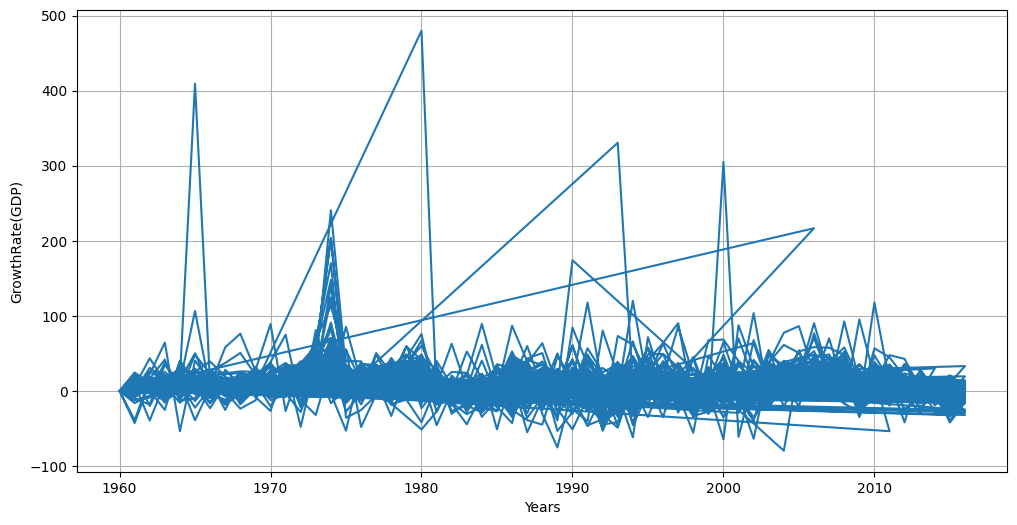

In [18]:
 df.plot(kind = 'line', x = 'Year', y = 'GDP', xlabel= 'Years', ylabel = 'GrowthRate(GDP)', figsize = (12,6), grid = True, legend = False)

* One country was readable but all countries are not readable & understandable
* So let's use 'Plotly module' because Plotly module will help us understand graphs easily and also allow to save them offline for futher use.

In [19]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# 3b. Plot a graph using 'Plotly module' to observe GDP growth of all countries 

In [48]:
import plotly.express as px
import plotly.offline as pyo

fig = px.line(df, x = 'Year', y = 'GDP', title = 'Conutries_GDP_Analysis', color = 'Country Name')
fig

# 3c. Analyze GDP rate of a specific country with respect to time 

In [55]:
df_pr = df[df['Country Name'] == 'World']
df_pr

,Country Name,Country Code,Year,Value,GDP
2249,World,WLD,1960,1.366678e+12,0.00
2250,World,WLD,1961,1.421788e+12,4.03
2251,World,WLD,1962,1.526955e+12,7.40
2252,World,WLD,1963,1.643752e+12,7.65
2253,World,WLD,1964,1.800796e+12,9.55
2254,World,WLD,1965,1.961780e+12,8.94
2255,World,WLD,1966,2.128450e+12,8.50
2256,World,WLD,1967,2.264600e+12,6.40
2257,World,WLD,1968,2.443224e+12,7.89
2258,World,WLD,1969,2.690798e+12,10.13


# 3d. Plot a graph to observe GDP growth of Country 'World' with normal graph & plotly module 

<Axes: xlabel='Year'>

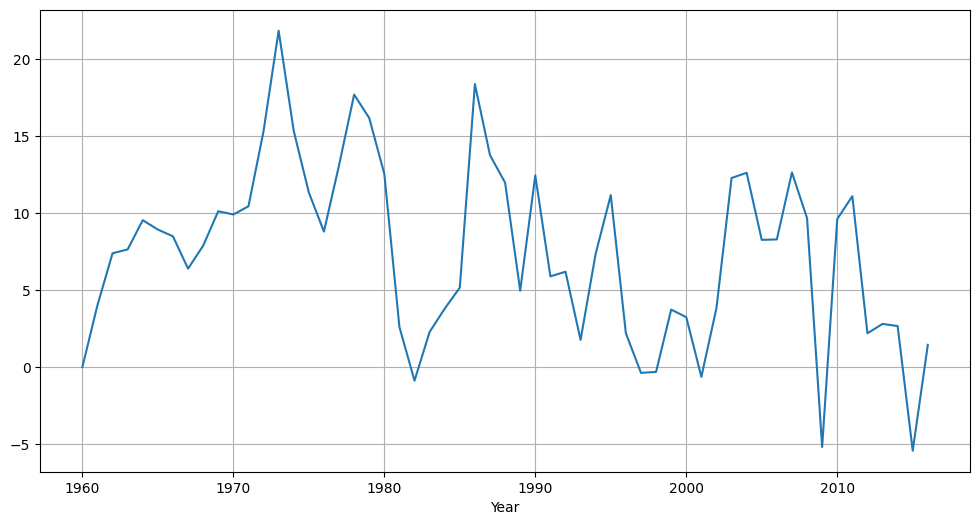

In [56]:
df_pr.plot(kind = 'line', x = 'Year', y = 'GDP', grid = True, legend = False, figsize = (12,6))

In [57]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'World GDP Analysis')
fig

# 4. OFFLINE SAVINGs OF GRAPHS with PLOTLY Module
# 4a. Plot country 'World' graph and save Offline 

In [24]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'World_GDP_Analysis')
pyo.plot(fig, filename = 'World_GDP_Analysis.html')

'World_GDP_Analysis.html'

# 4b. Plot a graph to observe growth of all countries with respect to year

In [25]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'Countries_GDP_Analysis', color = 'Country Name')
pyo.plot(fig, filename = 'Countries_GDP_Analysis.html')

'Countries_GDP_Analysis.html'

# 4c. Plot a graph to observe GDP growth of all countries with respect to year

In [40]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'Countries_GDP_Analysis', color = 'Country Name')
pyo.plot(fig, filename = 'Countries_GDP_Analysis2.html')

'Countries_GDP_Analysis2.html'

# 4d. Make a directory/Folder & plot graph to observe GDP growth for all countries separately in particular directory/folder

In [ ]:
import os
os.mkdir('Individual Countries GDP Analysis')

for country in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country + 'GDP Analysis')
    pyo.plot(fig, filename = 'Individual Countries GDP Analysis/' + country + 'Analysis.html', auto_open = False)

# 5. GDP Comparison of two countries

In [26]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']

df_pr = pd.concat([c1, c2], axis = 0)
df_pr

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


# 5a. Plot graph for GDP comparison of two countries 

In [27]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', color = 'Country Name', title = 'IND|CHN_GDP_Comparison.html')
pyo.plot(fig, filename = 'IND|CHN_GDP_Comparison.html')

'IND|CHN_GDP_Comparison.html'

# 5b. GDP Comparison of 4 countries

In [28]:
c1 = df[df['Country Name'] == 'India']
c2 = df[df['Country Name'] == 'China']
c3 = df[df['Country Name'] == 'Russian Federation']
c4 = df[df['Country Name'] == 'United States']

df_pr = pd.concat([c1, c2, c3, c4], axis = 0)
df_pr

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
...,...,...,...,...,...
11081,United States,USA,2012,1.615526e+13,4.11
11082,United States,USA,2013,1.669152e+13,3.32
11083,United States,USA,2014,1.739310e+13,4.20
11084,United States,USA,2015,1.812071e+13,4.18


# 5c. Graph plotting of GDP comparison of 4 Countries

In [29]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', color = 'Country Name', title = 'IND|CHN|RUS|USA_GDP_Comparison.html')
pyo.plot(fig, filename = 'IND|CHN|RUS|USA_GDP_Comparison.html')

'IND|CHN|RUS|USA_GDP_Comparison.html'

# 5d. Graph plotting of GDP comparison of 3 Countries with Range [Value]

In [30]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'IND|CHN|RUS GDP Comparison', color = 'Country Name', range_y = [0, 3000000000000])
pyo.plot(fig, filename = 'IND_CHN_RUS with range.html')

'IND_CHN_RUS with range.html'

# 5e. Function for GDP Comparison of Unlimited Countries

In [31]:
def compare_gdp(lst, isOpen):
    dfs = []
    for item in lst:
        df_pr = df[df['Country Name'] == item]
        dfs.append(df_pr)

    df_pr = pd.concat(dfs, axis = 0)
    fig = px.line(df_pr, x= 'Year', y = 'Value', title = 'GDP comparison_' + '|'.join(lst), color = 'Country Name')
    pyo.plot(fig, filename = '_'.join(lst) + 'GDP Comparison.html', auto_open = isOpen)

In [32]:
compare_gdp(['India', 'China'], False)
compare_gdp(['India', 'China', 'Italy'], True)

# 6. Extract 10 Countries containing maximum GDP in dataset

In [58]:
df_pr = df.nlargest(10, ['GDP'])
df_pr

,Country Name,Country Code,Year,Value,GDP
10306,Switzerland,CHE,1980,1.190083e+11,479.82
4909,Equatorial Guinea,GNQ,1965,6.474833e+07,409.33
3725,Cambodia,KHM,1993,2.533728e+09,330.58
4237,"Congo, Dem. Rep.",COD,2000,1.908805e+10,305.16
8558,Oman,OMN,1974,1.645918e+09,240.75
3864,Cayman Islands,CYM,2006,3.207033e+09,216.76
9340,Saudi Arabia,SAU,1974,4.541296e+10,203.82
9107,Qatar,QAT,1974,2.401403e+09,202.49
6263,Iraq,IRQ,1990,1.798858e+11,174.04
6723,Kiribati,KIR,1974,8.563717e+07,170.06


# 6a. Graph plotting of 10 Countries containing maximum GDP in dataset

In [59]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = '10 Countries with Higher GDP Rate', color = 'Country Name')
fig

In [52]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = '10 Countries with Higher GDP Rate', color = 'Country Name')
pyo.plot(fig, filename = '10Higher_GDP_Analysis.html')

'10Higher_GDP_Analysis.html'

In [53]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
